## House Price Prediction

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDB     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS '}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

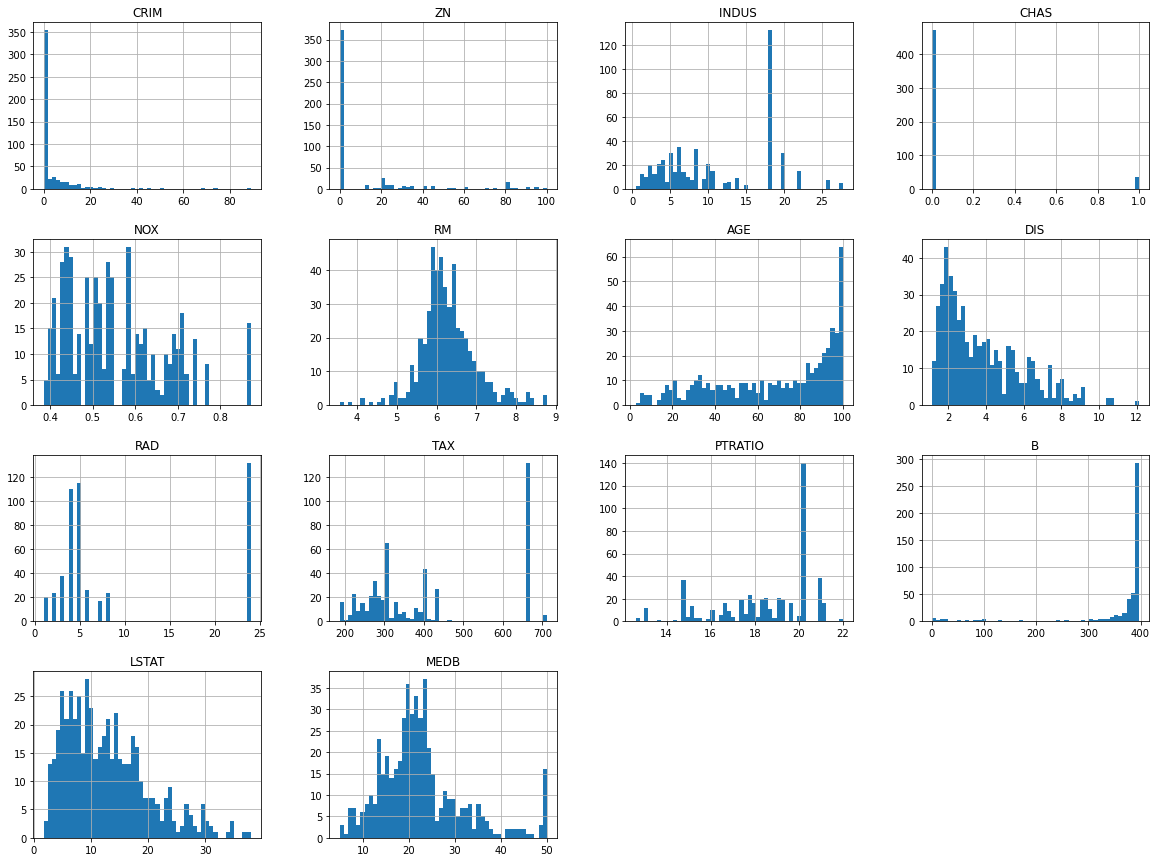

In [9]:
housing.hist(bins=50,figsize=(20,15))

## Splitting Train and Test data

import numpy as np   
def split_train_test(data,test_ratio):      
    np.random.seed(42)  ---->>  split data same auxa. No change in data.      
   shuffled=np.random.permutation(len(data))       
   test_set_size=int(len(data)*test_ratio)        
    test_indices=shuffled[:test_set_size]       
    train_indices=shuffled[test_set_size:]    
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set=split_train_test(housing,0.2)

print(f"Rows in train set:{len(train_set)}\n Rows in test set :{len(test_set)}\n)

In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(housing,test_size=0.2,random_state=42)

      

In [11]:
train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.630947,10.549020,11.737745,0.058824,0.547609,6.160833,68.648039,3.742949,10.313725,424.892157,18.999020,358.241275,13.428235,21.488235
std,7.459607,24.083242,6.722576,0.236456,0.108602,0.663825,28.890866,2.010749,9.161889,177.462472,1.800577,90.641872,7.244601,8.605804
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.561000,6.200000,1.169100,1.000000,188.000000,13.000000,6.680000,2.880000,5.000000
25%,0.087368,0.000000,6.102500,0.000000,0.448250,5.870250,43.800000,2.263950,4.000000,281.750000,18.400000,375.020000,7.687500,17.125000
50%,0.209885,0.000000,10.590000,0.000000,0.532000,6.170500,74.700000,3.353400,5.000000,345.000000,19.200000,392.205000,12.335000,20.150000
75%,4.522473,0.000000,18.100000,0.000000,0.621500,6.479250,95.225000,4.764825,24.000000,666.000000,20.200000,396.900000,18.017500,24.075000
max,45.746100,95.000000,27.740000,1.000000,0.871000,8.034000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## Stratified Sampling

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
95/7

13.571428571428571

In [18]:
376/28

13.428571428571429

## Finding Correlation  
Auta features(column) badau da arko badxa ki nai check garni 

In [19]:
corr_matrix=housing.corr()

In [20]:
corr_matrix['MEDB'].sort_values(ascending=False)

MEDB       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDB, dtype: float64

array([[<AxesSubplot:xlabel='MEDB', ylabel='MEDB'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDB'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDB'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDB'>],
       [<AxesSubplot:xlabel='MEDB', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDB', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDB', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

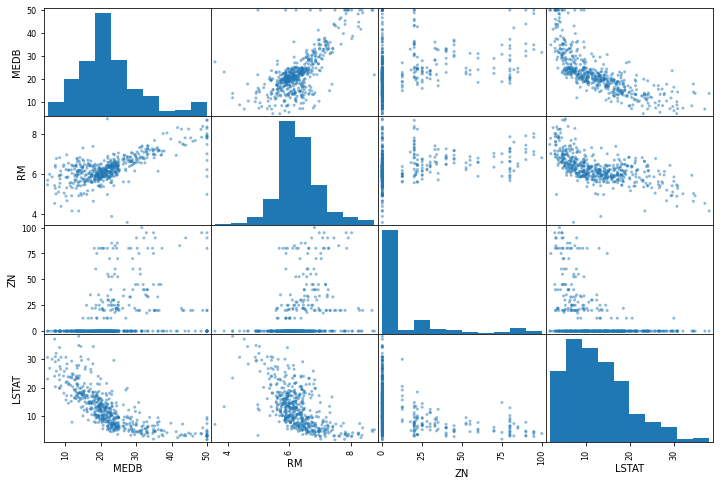

In [21]:
from pandas.plotting import scatter_matrix
attributes=["MEDB","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDB'>

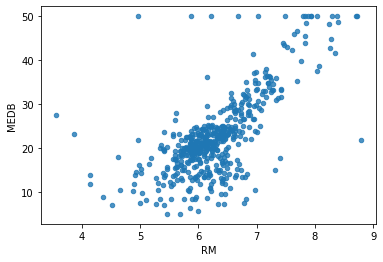

In [22]:
housing.plot(kind="scatter",x="RM",y="MEDB",alpha=0.8)

In [23]:
#housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
corr_matrix=housing.corr()
corr_matrix['MEDB'].sort_values(ascending=False)

MEDB       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDB, dtype: float64

In [26]:
housing.shape

(506, 14)

In [27]:
housing= strat_train_set.copy()

In [28]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDB     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [29]:
housing=strat_train_set.drop("MEDB",axis=1)

In [30]:
housing_labels=strat_train_set["MEDB"].copy()

## Missing Atributes through Sk-learn

In [31]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
X =imputer.transform(housing)



In [34]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [37]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting desired Model

                Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(housing_num_tr,housing_labels)

LinearRegression()

In [40]:
some_data=housing.iloc[:5]

In [41]:
some_labels=housing_labels.iloc[:5]

In [42]:
prepared_data= my_pipeline.transform(some_data)

In [43]:
model1.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [44]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

                Decision tree Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model2= DecisionTreeRegressor()
model2.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [46]:
model2.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

                Random Forest Regressor

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model3= RandomForestRegressor()
model3.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [48]:
model3.predict(prepared_data)

array([22.445, 25.537, 16.458, 23.455, 23.634])

## Evaluating  Model   
  
    

In [49]:
import numpy as np

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions=model1.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [51]:
lin_rmse

4.829321492635759

In [52]:
lin_mse

23.322346079233675

                  Evaluating  Decison tree regration Model

In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions=model2.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(lin_mse)

In [54]:
mse

0.0

In [55]:
rmse

4.829321492635759

                Using Cros Validation techniques

In [56]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model3,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [57]:
rmse_scores

array([2.66787448, 2.79835337, 4.47317217, 2.4820261 , 3.3044356 ,
       2.71856392, 4.72369715, 3.45027037, 3.47156027, 3.3627862 ])

In [58]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean :",scores.mean())
    print("Standard Deviation :", scores.std())

In [59]:
print_scores(rmse_scores)

Scores: [2.66787448 2.79835337 4.47317217 2.4820261  3.3044356  2.71856392
 4.72369715 3.45027037 3.47156027 3.3627862 ]
Mean : 3.3452739621362078
Standard Deviation : 0.7139402156666897


## Model ready

In [60]:
from joblib import dump, load
dump(model3,'House_price_model.joblib')

['House_price_model.joblib']

## Testing the model

In [61]:
X_test=strat_test_set.drop("MEDB",axis=1)
Y_test=strat_test_set["MEDB"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model3.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [62]:
final_rmse


2.919130368421926

Great one!!! Test ma rmse 3.0 ma xa vane model ma 3.3

In [63]:
print(final_predictions,list(Y_test))

[24.394 11.731 25.526 22.042 18.89  14.674 19.807 14.307 32.328 41.652
 19.855 11.815 24.725 26.675 19.521 11.404 31.85  14.445 23.804 18.535
 19.635 17.413 17.563 21.42  18.939 31.235 15.896 33.387  9.107 33.892
 24.555 21.303 23.031 10.741 21.206 11.582 42.806 24.492 23.878 42.025
 24.35  29.756 20.728 20.84  18.957 33.486 43.9   20.02  20.246 21.93
 20.985 14.684 21.056 15.022 24.673 32.956 42.222 29.714 19.772 20.626
 46.22   9.789 18.936 25.235 14.453 32.945 19.679 17.552 18.879 34.475
 26.118 22.96  21.238 22.569 34.731 12.533 15.429 20.18  20.803 21.233
 22.27  20.868 14.018 22.75  20.559 21.338 14.405 21.304 21.561 23.481
 18.492 27.029  7.399 26.461 19.39  29.392 20.526 30.861 14.349 26.67
 20.952 20.61 ] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [64]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])